# Challenges



In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## Challenge 1 - Gravitierende Containerschiffe

In der windstillen, ruhigen Nordsee warten zwei 50m breite Containerschiffe der Masse 30kT nebeneinander in 10m Entfernung voneinander auf die kommende Flut, um in den Hamburger Hafen einzulaufen. Müssen die Matrosen beachten, dass die beiden Schiffe sich nach Newton mit $$F_G(r)=-\frac{GM^2}{|x_1-x_2|^2}$$ gravitativ anziehen?

Simuliere diese Situation und bestimme so numerisch die Zeit, bis die beiden Schiffe durch gravitative Anziehung kollidieren. Wie weit müssen die Schiffe voneinander entfernt liegen, sodass Gravitation auf der Zeitskala von Ebbe und Flut keine Rolle mehr spielt?

<IPython.core.display.Javascript object>


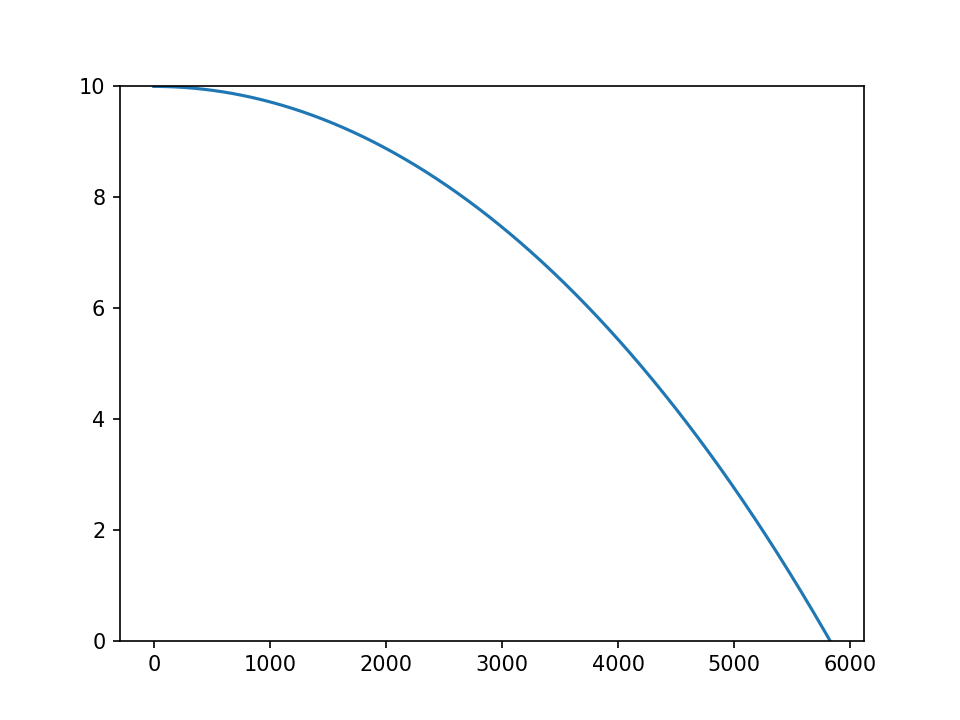

Collision after 1:37:06 (5826s). Simulated in 5827 steps.


In [2]:
import datetime

G = 6.674e-11
M = 30e6
F_G = lambda r: -G * M**2 / r**2
d_0 = 10
l = 400 # Länge in m
b = 50 # Breite in m

dt = 1 # Zeitschritt in s
d = [ d_0 ]
v = [ 0 ]
t = [ 0 ]
while d[-1] > 0:
    t.append(t[-1] + dt)
    a = F_G(d[-1] + b) / M
    dv = a * dt
    v.append(v[-1] + dv)
    dd = v[-1] * dt
    d.append(d[-1] + dd)
plt.plot(t, d)
plt.ylim(0, d_0)
print("Collision after {} ({}s). Simulated in {} steps.".format(datetime.timedelta(seconds=t[-1]), t[-1], len(t)))

## Challenge 2 - Stau auf der Autobahn

Warum bilden sich Staus? Simuliere eine N-spurige Autobahn mit dem _[Acceleration Model](http://traffic-simulation.de/info/IDM.html)_, _[Lane-Changing Model](http://traffic-simulation.de/info/MOBIL.html)_ und [Randbedingungen](http://traffic-simulation.de/info/BC.html) wie in [dieser Simulation](http://traffic-simulation.de).

Finde die Durchschnittsgeschwindigkeit oder das Geschwindigkeitsprofil abhängig von den Model-Parametern wie Geschwindigkeitsbegrenzung und Reaktionszeit. Solltest du im Stau Spuren wechseln? Welche Spur ist die schnellste?

<IPython.core.display.Javascript object>


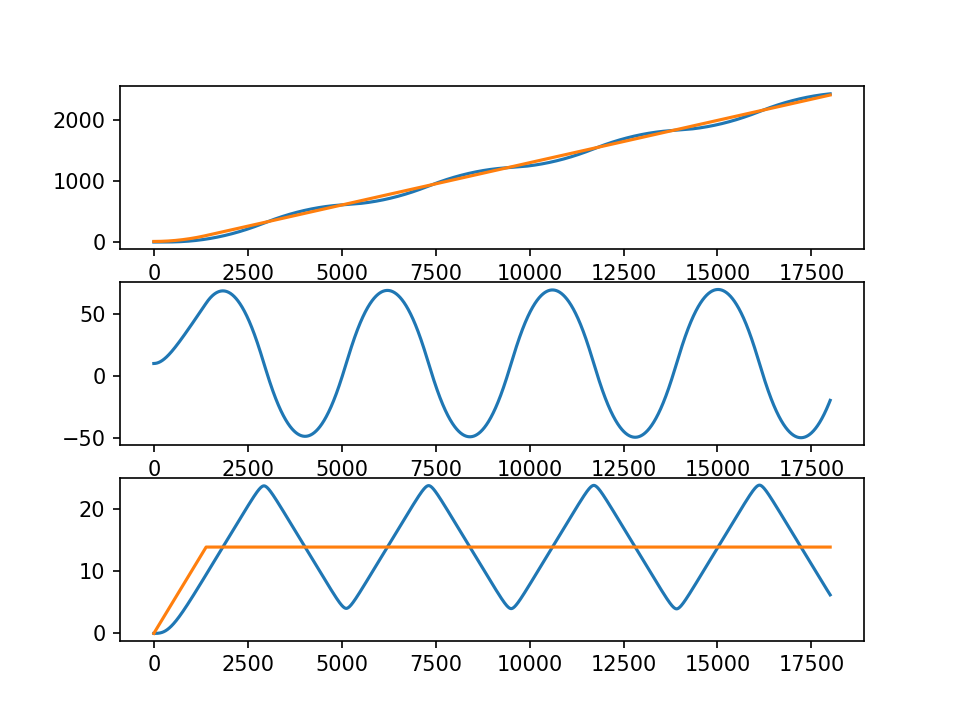

In [3]:
dt = 0.01
t = np.arange(0, datetime.timedelta(minutes=3).seconds, dt)
N = 2
d_0 = 10
x = [ np.linspace(0., d_0*(N-1), N) ]
v = [ np.repeat(0., N) ]
v_max = 100 / 60 / 60 * 1000 * 0.5
a_max = 1
q_max = 1
delay = 0
k = 1/d_0
for t_i in t:
    x_t = np.array(x[-1])
    v_t = np.array(v[-1])
    x_delayed = x[-1 - min(len(x) - 1, delay)]
    for i in range(N):
        dx = v_t[i] * dt
        x_t[i] += dx
        if i < N - 1:
            d = x_delayed[i + 1] - x_delayed[i]
            if d >= d_0:
                dv = a_max * (1 - np.exp(-k*(d - d_0))) * dt
            elif d < d_0:
                dv = -q_max * (1 - np.exp(k*(d - d_0))) * dt
        else:
            if v_t[i] < v_max:
                dv = a_max * dt
            else:
                dv = 0
        v_t[i] += dv
    x.append(x_t)
    v.append(v_t)
fig, axes = plt.subplots(3);
axes[0].plot(x)
axes[1].plot(np.diff(x))
axes[2].plot(v);